# Autograd: automatic differentiation

> Author : Badr TAJINI - Machine Learning 2 & Deep learning - ECE 2025-2026

---

When executing tensor operations, PyTorch can automatically construct on-the-fly the graph of operations to compute the gradient of any quantity with respect to any tensor involved.

More information on autotomatic differentiation in Pytorch [here](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html#sphx-glr-beginner-blitz-autograd-tutorial-py)

## Visualizing the computational graph

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import torch

PyTorchViz is a small package to create visualizations of PyTorch execution graphs and traces.

In [10]:
!pip install torchviz


In [11]:
import torchviz

Inn order to enable automatic differentiation, PyTorch keeps track of all operations involving tensors for which the gradient may need to be computed (i.e., require_grad is True). The operations are recorded as a directed graph. 

Torch tensors are recalled [here](https://pytorch.org/docs/stable/tensors.html) 



In [12]:
x = torch.ones(2, 2)
print(x)

tensor([[1., 1.],
        [1., 1.]])


A Tensor has a Boolean field *requires_grad*, set to False by default, which states if PyTorch should build the graph of operations so that gradients wrt to it can be computed.

In [13]:
x.requires_grad

False

In [14]:
x.numpy()

array([[1., 1.],
       [1., 1.]], dtype=float32)

In [15]:
x.requires_grad_(True)
x.requires_grad

True

### Question: The following cell gives an error. Why?

In [16]:
x.numpy()

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

The detach() method constructs a new view on a tensor which is declared not to need gradients, i.e., it is to be excluded from further tracking of operations, and therefore the subgraph involving this view is not recorded.

In [17]:
x.detach().numpy()

array([[1., 1.],
       [1., 1.]], dtype=float32)

In [18]:
x.data.numpy() # Torch.data returns the "data" (array_like) stored in the tensor

array([[1., 1.],
       [1., 1.]], dtype=float32)

In [19]:
x.requires_grad

True

In [20]:
y = x + 2
print(y)
torchviz.make_dot(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

**Broadcasting**

Recall: Broadcasting **automatically** expands dimensions by replicating coefficients, when it is necessary to perform operations.

1. If one of the tensors has fewer dimensions than the other, it is reshaped by adding as many dimensions of size 1 as necessary in the front; then
2. for every mismatch, if one of the two tensor is of size one, it is expanded along this axis by replicating  coefficients.

If there is a tensor size mismatch for one of the dimension and neither of them is one, the operation fails.

In [21]:
A = torch.tensor([[1.], [2.], [3.], [4.]])
print(A.size())
print(A)
B = torch.tensor([[5., -5., 5., -5., 5.]])
print(B.size())
print(B)
C = A + B
print(C)

torch.Size([4, 1])
tensor([[1.],
        [2.],
        [3.],
        [4.]])
torch.Size([1, 5])
tensor([[ 5., -5.,  5., -5.,  5.]])
tensor([[ 6., -4.,  6., -4.,  6.],
        [ 7., -3.,  7., -3.,  7.],
        [ 8., -2.,  8., -2.,  8.],
        [ 9., -1.,  9., -1.,  9.]])


Back to Autograd!

In [22]:
x = torch.ones(2, 2)
x.requires_grad_(True)
y = x+2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [23]:
y.requires_grad

True

Tensor and Function are interconnected and build up an acyclic graph, that encodes a complete history of computation. 

Each tensor has a .grad_fn attribute that references a Function that has created the Tensor (except for Tensors created by the user - their grad_fn is None).

In [24]:
print(x)
print(x.grad_fn)
print(y)
print(y.grad_fn)
torchviz.make_dot(y) 

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
None
tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [25]:
z = y * y * 3
print(z)
torchviz.make_dot(z) 

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>)


ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [26]:
out = z.mean()
print(out)
torchviz.make_dot(out) 

tensor(27., grad_fn=<MeanBackward0>)


ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

After the computation is finished, i.e. _forward pass_, you can call ```.backward()``` and have all the gradients computed automatically.

In [27]:
out.backward()

The gradients w.r.t. this variable is accumulated into ```.grad```.

In [28]:
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


### Question: Explain mathematically the value of "x.grad"


[Why can I not see .grad of an intermediate variable?](https://discuss.pytorch.org/t/why-cant-i-see-grad-of-an-intermediate-variable/94)

Gradients are only retained for leaf variables. 

Non-leaf variables’ gradients are not retained to be inspected later. This was done by design, to save memory.

In [29]:
print(y.grad)
print(out.grad)

None
None


/tmp/ipykernel_560/2556660290.py:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more information. (Triggered internally at /pytorch/build/aten/src/ATen/core/TensorBody.h:492.)
  print(y.grad)
/tmp/ipykernel_560/2556660290.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30

In [30]:
x = 2 * torch.ones(2, 2)
print(x)
x.requires_grad_(True)
out = (x * x * x + 2 ).mean()
print(out)
torchviz.make_dot(out)

tensor([[2., 2.],
        [2., 2.]])
tensor(10., grad_fn=<MeanBackward0>)


ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [31]:
out.backward(torch.tensor(2.0))

### Question: Explain mathematically the value of "x.grad" in the following cell

In [32]:
print(x.grad)

tensor([[6., 6.],
        [6., 6.]])


## How to compute the gradient when I want?



In [33]:
x = torch.ones(2, 2)
x.requires_grad_(True)
y = x+2
z = 3 * y ** 2 
out = z.mean()

out.backward(retain_graph=True)

print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


Calling again the "backward" process does not launch an error

In [34]:
out.backward(retain_graph=True)

In [35]:
print(x.grad)

tensor([[9., 9.],
        [9., 9.]])


In [36]:
torch.autograd.grad(out, out, retain_graph=True)

(tensor(1.),)

In [37]:
torch.autograd.grad(out, z, retain_graph=True)

(tensor([[0.2500, 0.2500],
         [0.2500, 0.2500]]),)

In [38]:
torch.autograd.grad(out, y, retain_graph=True)

(tensor([[4.5000, 4.5000],
         [4.5000, 4.5000]]),)

In [39]:
out.backward(torch.tensor(2.0), retain_graph=True)

In [40]:
print(x.grad)

tensor([[18., 18.],
        [18., 18.]])


## A last example

In [41]:
x=torch.ones(10, requires_grad=True)

y=x**2
z=x**3
r=(y+z).sum()

r.backward()
print(x.grad)
torchviz.make_dot(r) 

tensor([5., 5., 5., 5., 5., 5., 5., 5., 5., 5.])


ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

## Gradient accumulation


The gradients must be set to zero manually. Otherwise they will cumulate across several _.backward()_ calls. 
This accumulating behavior is desirable in particular to compute the gradient of a loss summed over several “mini-batches,” or the gradient of a sum of losses.


In [42]:
x = torch.ones(1, 1,requires_grad = True)
out = (x+1)**2
print(out)

tensor([[4.]], grad_fn=<PowBackward0>)


In [43]:
out.backward(torch.ones(1,1),retain_graph=True)
print(x.grad)
out.backward(2 * torch.ones(1,1),retain_graph=True)
print(x.grad)
out.backward(retain_graph=True)
print(x.grad)

tensor([[4.]])
tensor([[12.]])
tensor([[16.]])


In [44]:
# Manually zero the gradients after updating weights
x.grad.data.zero_()

tensor([[0.]])

In [45]:
out.backward(torch.ones(1,1),retain_graph=True)
print(x.grad)
x.grad.data.zero_()
out.backward(2 * torch.ones(1,1),retain_graph=True)
print(x.grad)
x.grad.data.zero_()
out.backward(retain_graph=True)
print(x.grad)


tensor([[4.]])
tensor([[8.]])
tensor([[4.]])


If you want to come back to the difference between detach and data see [Differences between .data and .detach](https://github.com/pytorch/pytorch/issues/6990)

# Playing with a neural network in pytorch: non-linear regression

## Non-linear regression with a neural network

An implementation of **(Batch) Gradient Descent** using the nn package. Here we have a super simple model with only one layer and no activation function!

Generate the dataset and visualize it.

In [46]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


# Make data
num_samples = 10
X1 = np.linspace(-5, 5, num_samples) 
X2 = np.linspace(-5, 5, num_samples) 
X1grid, X2grid = np.meshgrid(X1, X2)
Y = -(0.1*X1grid**2 + 3*np.sin(0.1*X2grid) + 0.1) 

#print(X1grid)
#print(X2grid)
#print(Y)

# Plot the surface.
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X1grid, X2grid, Y, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

TypeError: FigureBase.gca() got an unexpected keyword argument 'projection'

<Figure size 640x480 with 0 Axes>

In [47]:
x1n = X1grid.ravel().reshape(-1, 1)
x2n = X2grid.ravel().reshape(-1, 1)
xn = np.concatenate((x1n,x2n),axis=1)
yn = Y.ravel().reshape(-1, 1)
#print(x1n.shape)
#print(x2n.shape)
print(xn.shape)
print(yn.shape)

# Convert in pytorch tensors
x = torch.from_numpy(xn).float()
y = torch.from_numpy(yn).float()
#print(x)
#print(y)
print(x.shape)

(100, 2)
(100, 1)
torch.Size([100, 2])


## Neural network with full implementation (gradient computation and estimate update)

In [48]:
import torch

dtype = torch.float


# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = num_samples**2, 2, 100, 1

# Randomly initialize weights
w1 = torch.randn(D_in, H, dtype=dtype)
w2 = torch.randn(H, D_out,  dtype=dtype)

learning_rate = 1e-6 
for t in range(10001):
    # Forward pass: compute predicted y
    h = x.mm(w1)
    
    h_relu = h.clamp(min=0)
    y_pred = h_relu.mm(w2)
    #print(y_pred)

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum().item()
    if t % 1000 == 0:
        print(t, loss)

    # Backprop to compute gradients of w1 and w2 with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.t().mm(grad_y_pred)
    grad_h_relu = grad_y_pred.mm(w2.t())
    grad_h = grad_h_relu.clone()
    grad_h[h < 0] = 0
    grad_w1 = x.t().mm(grad_h)

    # Update weights using gradient descent
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

0 131183.3125
1000 41.445404052734375
2000 16.53565216064453
3000 12.020397186279297
4000 10.312079429626465
5000 9.404156684875488
6000 8.841480255126953
7000 8.445716857910156
8000 8.122562408447266
9000 7.850582599639893
10000 7.641377925872803


Compare the first values

In [49]:
print(y[0:5])
print(y_pred[0:5])

tensor([[-1.1617],
        [-0.1741],
        [ 0.5667],
        [ 1.0605],
        [ 1.3074]])
tensor([[-0.7186],
        [-0.0189],
        [ 0.6516],
        [ 1.0499],
        [ 1.2616]])


Plot the approximation in 1D

In [50]:
def plotApproximation(y,y_pred):
  plt.figure(figsize=(6, 4))
  plt.plot(y.detach().numpy(),'b-')
  plt.plot(y_pred.detach().numpy(),'r-*')
  plt.xlabel('$x$')
  plt.ylabel('$y$')
  plt.title('Approximation with the neural network')
  plt.show()

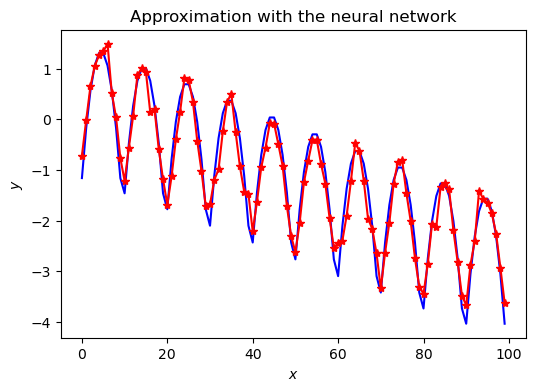

In [51]:
plotApproximation(y,y_pred)

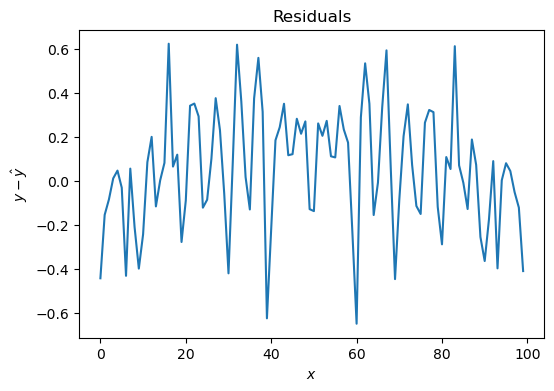

In [52]:
plt.figure(figsize=(6, 4))
plt.plot(y.numpy()-y_pred.numpy())
plt.title('Residuals')
plt.xlabel('$x$')
plt.ylabel('$y-\hat{y}$')
plt.show()

Last step, we use directly the optim package to update the weights and bias.

## Neural network with automatic gradient computation (but still the explicit estimate update)


A fully-connected ReLU network with one hidden layer, trained to predict y from x
by minimizing squared Euclidean distance.

This implementation uses the nn package from PyTorch to build the network.
PyTorch autograd makes it easy to define computational graphs and take gradients,
but raw autograd can be a bit too low-level for defining complex neural networks;
this is where the nn package can help. The nn package defines a set of Modules,
which you can think of as a neural network layer that has produces output from
input and may have some trainable weights.

### Question: use autograd to compute the gradient. You can start from the full implementation of the neural network.

In [53]:
import torch

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = num_samples**2, 2, 100, 1

# Use the nn package to define our model as a sequence of layers. nn.Sequential
# is a Module which contains other Modules, and applies them in sequence to
# produce its output. Each Linear Module computes output from input using a
# linear function, and holds internal Tensors for its weight and bias.
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)

# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-6
for t in range(10001):
    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Tensor of input data to the Module and it produces
    # a Tensor of output data.
    y_pred = model(x)

    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(y_pred, y)
    if t % 1000 == 0:
        print(t, loss.item())

    
    # COMPLETE THE CODE FROM HERE
    # ...

0 233.18223571777344
1000 233.18223571777344
2000 233.18223571777344
3000 233.18223571777344
4000 233.18223571777344
5000 233.18223571777344
6000 233.18223571777344
7000 233.18223571777344
8000 233.18223571777344
9000 233.18223571777344
10000 233.18223571777344


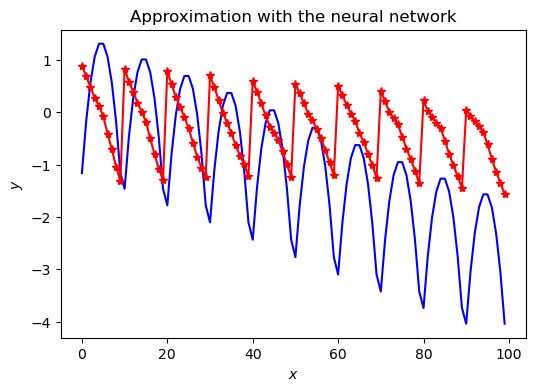

In [54]:
plotApproximation(y,y_pred)

## Neural network with automatic gradient computation and automatic estimate update

A fully-connected ReLU network with one hidden layer, trained to predict y from x
by minimizing squared Euclidean distance.

This implementation uses the nn package from PyTorch to build the network.

Rather than manually updating the weights of the model as we have been doing,
we use the optim package to define an Optimizer that will update the weights
for us. The optim package defines many optimization algorithms that are commonly
used for deep learning, including SGD+momentum, RMSProp, Adam, etc.

### Question: use the Torch optimizer to do the gradient descent. You can start from the full implementation of the neural network with automatic differentiation.

Details on Optimizer are [here](https://pytorch.org/docs/stable/optim.html)

In [55]:
import torch

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = num_samples**2, 2, 100, 1

# Use the nn package to define our model and loss function.
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)
loss_fn = torch.nn.MSELoss(reduction='sum')

# Use the optim package to define an Optimizer that will update the weights of
# the model for us. Here we will use Adam; the optim package contains many other
# optimization algoriths. The first argument to the Adam constructor tells the
# optimizer which Tensors it should update.
learning_rate = 1e-6
#optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
for t in range(10001):
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(x)

    # Compute and print loss.
    loss = loss_fn(y_pred, y)
    if t % 1000 == 0:
        print(t, loss.item())

    # COMPLETE THE CODE FROM HERE
    # ...

0 349.61236572265625
1000 349.61236572265625
2000 349.61236572265625
3000 349.61236572265625
4000 349.61236572265625
5000 349.61236572265625
6000 349.61236572265625
7000 349.61236572265625
8000 349.61236572265625
9000 349.61236572265625
10000 349.61236572265625


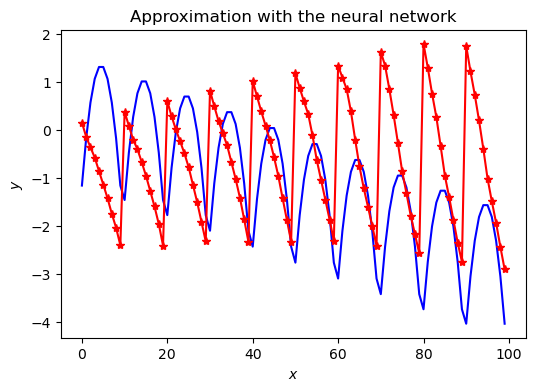

In [56]:
plotApproximation(y,y_pred)